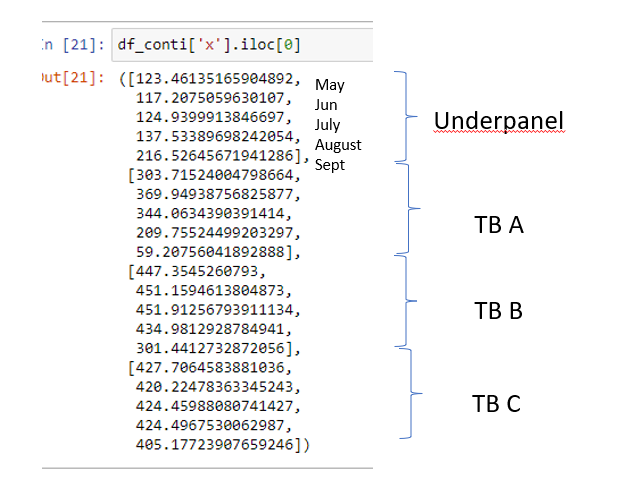


In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pyproj import CRS
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np

In [5]:
datafile = 'PKLs\ALLSetups_Alaska.pkl'

In [7]:
df = pd.read_pickle(datafile)

In [8]:
df

,gid,setup,latitude,longitude,pitch,MonthStart,MonthEnd,ghi_sum,ResultPVWm2Front,ResultPVWm2Back,...,inside_normGHI,testbedA1_normGHI,testbedA2_normGHI,testbedA3_normGHI,testbedB1_normGHI,testbedB2_normGHI,testbedB3_normGHI,testbedC1_normGHI,testbedC2_normGHI,testbedC3_normGHI
0,1887,1,51.889999,-178.059998,5.000000,1,1,15340,9718.848936,"[4418.885413000001, 4310.194417, 4188.748527, ...",...,0.551524,0.525511,0.571706,0.556825,NaN,NaN,NaN,NaN,NaN,NaN
1,2027,1,51.730000,-177.899994,5.000000,1,1,14570,10585.799953,"[3696.167601, 3716.2019020000002, 3813.990426,...",...,0.565932,0.530521,0.595996,0.570792,NaN,NaN,NaN,NaN,NaN,NaN
2,1887,2,51.889999,-178.059998,5.000000,1,1,15340,9777.619473,"[4798.869458, 4511.798633, 4515.445362, 4283.7...",...,0.569174,0.550023,0.584733,0.572439,NaN,NaN,NaN,NaN,NaN,NaN
3,2027,2,51.730000,-177.899994,5.000000,1,1,14570,10531.571046,"[4262.854979, 4149.732131999999, 3991.39005900...",...,0.577176,0.560767,0.599582,0.571723,NaN,NaN,NaN,NaN,NaN,NaN
4,1887,3,51.889999,-178.059998,5.000000,1,1,15340,10019.533759,"[5317.925536999999, 5216.477803000001, 5225.73...",...,0.663611,0.649107,0.676826,0.664782,NaN,NaN,NaN,NaN,NaN,NaN
5,2027,3,51.730000,-177.899994,5.000000,1,1,14570,10882.634381,"[4958.680253000001, 4964.496008000001, 4575.22...",...,0.676325,0.662318,0.694217,0.672794,NaN,NaN,NaN,NaN,NaN,NaN
6,1887,4,51.889999,-178.059998,8.000000,1,1,15340,9937.675302,"[5532.0951110000005, 5437.0043590000005, 5500....",...,0.653437,0.586162,0.652406,0.699829,0.701632,0.675367,0.609607,NaN,NaN,NaN
7,2027,4,51.730000,-177.899994,8.000000,1,1,14570,10934.354607,"[4549.398943, 4543.508784, 4868.417450999999, ...",...,0.676191,0.608053,0.677713,0.718130,0.732762,0.700713,0.624905,NaN,NaN,NaN
8,1887,5,51.889999,-178.059998,11.000000,1,1,15340,10064.487957,"[6028.4716450000005, 5957.571505, 6235.1384769...",...,0.691900,0.624394,0.671454,0.698689,0.714882,0.718563,0.725775,0.723865,0.698222,0.654950
9,2027,5,51.730000,-177.899994,11.000000,1,1,14570,11079.116911,"[5582.711365000001, 5614.416, 5555.87381599999...",...,0.715951,0.643061,0.709471,0.753259,0.759350,0.746324,0.736703,0.733370,0.704178,0.663126


In [3]:
# import the United States shape file
states = gpd.read_file('../tl_2022_us_state/tl_2022_us_state.shp')
#states = states.to_crs("EPSG:5070")

# set state code as index, exclude states that we will never display
states = states.set_index('STUSPS').drop(index=['PR', 'VI', 'MP', 'GU', 'AS'])

conti = states.drop(index=['HI', 'AK'])
conti = conti.to_crs("EPSG:5070")

alaska = states.loc[['AK']]
hawaii = states.loc[['HI']]

In [3]:
mypath = 'HPCFiles/dist_res'
pkl_list = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.endswith('pkl')]
conti_list = [f for f in pkl_list if f.split('_')[-1].split('.')[0] not in ['USA', 'Alaska', 'Hawaii']]

df_conti2 = pd.read_pickle(join(mypath, conti_list[0]))

for pkl in conti_list[1:]:
    df = pd.read_pickle(join(mypath, pkl))
    df_conti2 = pd.concat([df_conti2, df],axis=0)

#df_conti2 = pd.to_pickle(join(mypath, 'res_dist_USA.pkl'))
df_alaska2 = pd.read_pickle(join(mypath, 'res_dist_Alaska.pkl'))    
df_hawaii2 = pd.read_pickle(join(mypath, 'res_dist_Hawaii.pkl'))

In [4]:
df_conti2['x'].iloc[0]

([123.46135165904892,
  117.2075059630107,
  124.9399913846697,
  137.53389698242054,
  216.52645671941286],
 [303.71524004798664,
  369.94938756825877,
  344.0634390391414,
  209.75524499203297,
  59.20756041892888],
 [447.3545260793,
  451.1594613804873,
  451.91256793911134,
  434.9812928784941,
  301.4412732872056],
 [427.7064583881036,
  420.22478363345243,
  424.45988080741427,
  424.4967530062987,
  405.17723907659246])

In [23]:
poswanted_conti = []
poswanted_hawaii = []
poswanted_alaska = []
mmonth = 1 # 0 - May, 1 - June, 2 - July, 3 - August, 4 - September
testbed = 3 # 0 - underpanel, 1 - TBA, 2 - TBB, 3 - TBC

for ii in range(0, len(df_conti2)):
    poswanted_conti.append(df_conti2['x'].iloc[ii][testbed][mmonth]) # May undertestbed)

for ii in range(0, len(df_alaska2)):
    poswanted_alaska.append(df_alaska2['x'].iloc[ii][testbed][mmonth]) # May undertestbed)

for ii in range(0, len(df_hawaii2)):
    poswanted_hawaii.append(df_hawaii2['x'].iloc[ii][testbed][mmonth]) # May undertestbed)
    
    
    


In [24]:
df_alaska2.keys()[0:2]

Index(['latitude', 'longitude'], dtype='object')

In [25]:
df_conti = df_conti2[['latitude', 'longitude']]
df_alaska = df_alaska2[['latitude', 'longitude']]
df_hawaii = df_hawaii2[['latitude', 'longitude']]

In [26]:
df_conti['x'] = poswanted_conti
df_alaska['x'] = poswanted_alaska
df_hawaii['x'] = poswanted_hawaii

In [27]:
#df_conti = pd.to_pickle(join(mypath, 'res_dist_USA.pkl'))
# df_USA = pd.read_pickle(join(mypath, 'res_dict_USA.pkl'))
# df_USA.shape

In [28]:
geo_conti = gpd.GeoDataFrame(df_conti['x'], 
                 geometry = [Point(xy) for xy in zip(df_conti['longitude'], df_conti['latitude'])],
                 crs = CRS('EPSG:4326')).to_crs(conti.crs)

geo_alaska = gpd.GeoDataFrame(df_alaska['x'], 
                 geometry = [Point(xy) for xy in zip(df_alaska['longitude'], df_alaska['latitude'])],
                 crs = CRS('EPSG:4326')).to_crs(alaska.crs)

geo_hawaii = gpd.GeoDataFrame(df_hawaii['x'], 
                 geometry = [Point(xy) for xy in zip(df_hawaii['longitude'], df_hawaii['latitude'])],
                 crs = CRS('EPSG:4326')).to_crs(hawaii.crs)

In [29]:
geo_conti['x'].min()

214.52707425907352

In [30]:
geo_conti['x'].quantile(q=0.98, interpolation='linear')

553.0920684035016

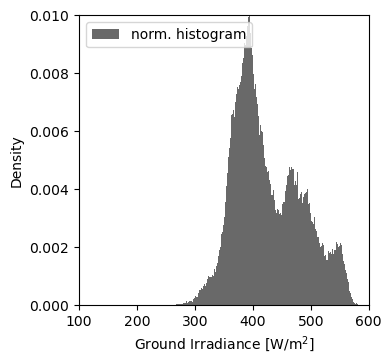

In [31]:
fig, ax = plt.subplots(figsize=(4,4))
geo_conti['x'].plot.hist(bins=1000, density=True, color='dimgray', label='norm. histogram')

ax.legend()

for rect in ax.patches:
    if rect.get_x() < 0.0:
        rect.set_color('firebrick')

#ax.set_xlim(-2.5, 16)
#ax.set_ylim(0, 0.225)
ax.set_xlabel('Ground Irradiance [W/m$^2$]')
ax.set_ylabel('Density')
ax.set_box_aspect(1)
ax.set_ylim(0, 0.01)
ax.set_xlim(100,600)
plt.tight_layout()
plt.savefig('gap_dist_USA_hist_C.png', dpi=600)
plt.savefig('gap_dist_USA_hist_C.pdf')

In [ ]:
plt.rcParams.update({'font.size': 20})

In [ ]:
# create an axis with 2 insets − this defines the inset sizes
fig, continental_ax = plt.subplots(figsize=(13, 8))
alaska_ax = continental_ax.inset_axes([.08, .01, .20, .28])
hawaii_ax = continental_ax.inset_axes([.28, .05, .1, .132])


# Set bounds to fit desired areas in each plot
continental_ax.set_xlim(-2.5E6, 2.5E6)
#continental_ax.set_ylim(22, 53)
continental_ax.axis('off')

alaska_ax.set_ylim(51, 72)
alaska_ax.set_xlim(-180, -127)
alaska_ax.axis('off')

hawaii_ax.set_ylim(18.8, 22.5)
hawaii_ax.set_xlim(-160, -154.6)
hawaii_ax.axis('off')

# Plot the data per area - requires passing the same choropleth parameters to each call
# because different data is used in each call, so automatically setting bounds won’t work

vmin = 200.0
vmax = 600.0

bound_plot = {'color':'gray', 'lw':0.75 }

conti.boundary.plot(ax=continental_ax, **bound_plot)
alaska.boundary.plot(ax=alaska_ax, **bound_plot)
hawaii.boundary.plot(ax=hawaii_ax, **bound_plot)

cont_plot = {'column':'x', 'cmap':'viridis', 'vmin':vmin, 'vmax':vmax, 'marker':'o', 'markersize':0.1} #
legend_kwds={'shrink':0.75, 'drawedges':False, 'label':'Ground Irradiance [W/m$^2$]', #'ticks': np.linspace(0,15, 16), 
             'pad':0, 'aspect':30}

geo_conti.plot(ax=continental_ax, legend=True, legend_kwds=legend_kwds, **cont_plot)
geo_alaska.plot(ax=alaska_ax, **cont_plot)
geo_hawaii.plot(ax=hawaii_ax,  **cont_plot)

continental_ax.set_title('Ground Irradiance Testbed C in June', fontsize=20, y=0.95)

plt.tight_layout()
plt.savefig('AgriPV_TestbedC_June.png', dpi=600)